In [1]:
import cifar10
import matplotlib.pyplot as plt

In [2]:
cifar10.data_path = "data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [18]:
labels_train.shape
labels_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [7]:
labels_test.shape

(10000, 10)

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import ensemble

In [9]:
images_train.shape

(50000, 32, 32, 3)

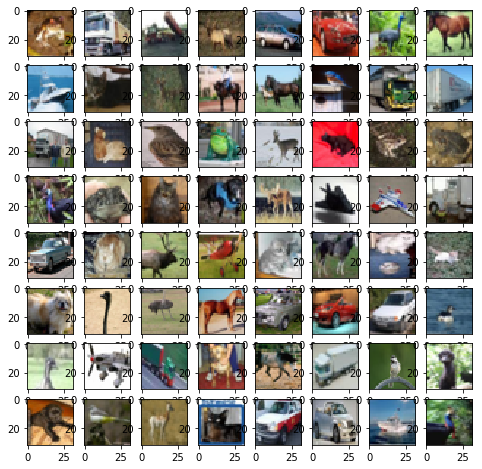

In [10]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(images_train[i],cmap=plt.cm.bone)
plt.show()
    

In [11]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [12]:
data_train = images_train.reshape(50000,3072)
data_test = images_test.reshape(10000,3072)

In [13]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(data_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
pca.components_.shape

(3072, 3072)

In [15]:
k=0
total=sum(pca.explained_variance_)
currentSum=0
while currentSum/total<0.95:
    currentSum+=pca.explained_variance_[k]
    k=k+1

In [16]:
pca_t=PCA(n_components=k,whiten=True)

In [17]:
x_transform = pca_t.fit_transform(data_train)
x_transform.shape

(50000, 217)

In [18]:
x_approx = pca_t.inverse_transform(x_transform)
x_approx = x_approx.reshape((50000, 32, 32, 3))
x_approx.shape

(50000, 32, 32, 3)

In [19]:
print(pca_t.components_.shape)
eigenv = pca_t.components_.reshape(k,32,32,3)

(217, 3072)


In [20]:
x_train_pca = x_transform
x_test_pca = pca_t.transform(data_test)

In [21]:
clf_RF = RandomForestClassifier()
grid_RF ={
    'n_estimators':[5,10,15,20],
    'max_depth':[5,10,20,30]
}
grid_search_RF = GridSearchCV(clf_RF, grid_RF)
grid_search_RF.fit(x_train_pca, cls_train)
grid_search_RF.best_estimator_
grid_search_RF.best_score_

0.37164

In [ ]:
clf_RF = RandomForestClassifier()
grid_RF ={
    'n_estimators':[5,10,20,30],
    'max_depth':[10,20,30,35]
}
grid_search_RF = GridSearchCV(clf_RF, grid_RF)
grid_search_RF.fit(x_train_pca, cls_train)
grid_search_RF.best_estimator_
grid_search_RF.best_score_

0.39174

In [ ]:
clf_SVC = svm.SVC()
grid_SVC = {'C' : [1e2, 1e3, 5e3, 1e4],
       'gamma' : [1e-3, 5e-4, 1e-4]}
grid_search_SVC = GridSearchCV(clf_SVC, grid_SVC,cv=model_selection.KFold(n_splits=10,shuffle=True,random_state=1))
grid_search_SVC.fit(x_train_pca,cls_train)
grid_search_SVC.best_score_

In [ ]:
clf_DT = DecisionTreeClassifier(criterion="entropy",splitter="best")
grid_DT = {'min_samples_split':[2,5,10,15,20,25,30],'max_depth':[10,15,20,25,30,35],
           'min_impurity_decrease':[10**-i for i in range(2, 5)]}
grid_search_DT = GridSearchCV(clf_DT, grid_DT,cv=model_selection.KFold(n_splits=10,shuffle=True,random_state=1))
grid_search_DT.fit(x_train_pca,cls_train)
grid_search_DT.best_score_

In [ ]:
data_test.shape

In [ ]:
grid_search_RF.predict(x_test_pca)